In [2]:
import flatspin.model as md
import matplotlib.pyplot as plt

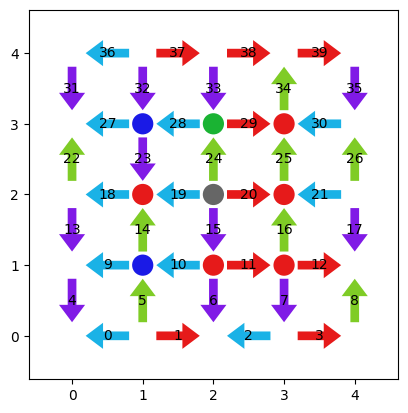

In [13]:
model = md.SquareSpinIceClosed(init='ground')

model.randomize(seed=0x9876)
#model.spin[23] = 1
#model.spin[27] = 1
model.plot()
model.plot_vertices();

for i in model.indices():
    plt.text(model.pos[i,0], model.pos[i,1], str(i), ha='center', va='center')

In [14]:
model.vertices()

[array([ 5,  9, 10, 14]),
 array([ 6, 10, 11, 15]),
 array([ 7, 11, 12, 16]),
 array([14, 18, 19, 23]),
 array([15, 19, 20, 24]),
 array([16, 20, 21, 25]),
 array([23, 27, 28, 32]),
 array([24, 28, 29, 33]),
 array([25, 29, 30, 34])]

In [15]:
v = [16, 20, 21, 25]
model.vertex_pos(v)

array([3., 2.])

In [16]:
for v in model.vertices():
    print(model.vertex_mag(v))

[-2.  2.]
[-6.123234e-17 -2.000000e+00]
[2. 0.]
[-2.  0.]
[6.123234e-17 0.000000e+00]
[6.123234e-17 2.000000e+00]
[-2. -2.]
[4.97899625e-17 0.00000000e+00]
[6.123234e-17 2.000000e+00]


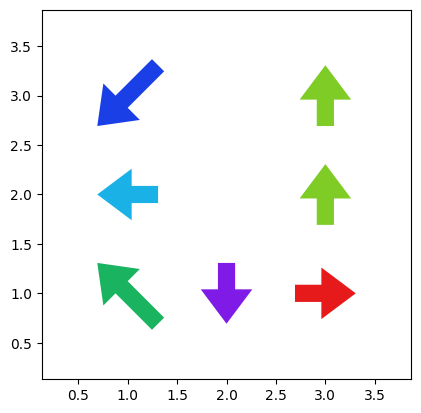

In [17]:
model.plot_vertex_mag();

In [19]:
for v in model.vertices():
    print(model.vertex_type(v))

2
3
3
2
4
3
4
1
3


In [20]:
print("Vertex counts:", model.vertex_count())

Vertex counts: ((1, 2, 3, 4), (1, 2, 4, 2))


In [21]:
print("Vertex population:", model.vertex_population())

Vertex population: ((1, 2, 3, 4), (0.1111111111111111, 0.2222222222222222, 0.4444444444444444, 0.2222222222222222))


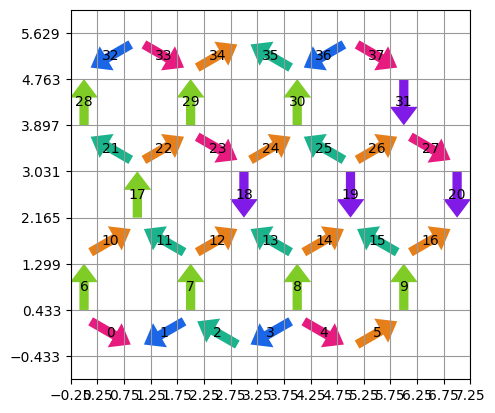

In [25]:
from flatspin.model import KagomeSpinIce
from flatspin import Grid
from flatspin.plotting import plot_vectors

def draw_grid(grid):
    edges = grid.edges()
    #print(edges)
    xmin, ymin, xmax, ymax = grid.extent
    #print(xmin, ymin, xmax, ymax)
    plt.grid(True, c='#999', alpha=1)
    
    plt.xticks(edges[0])
    plt.yticks(edges[1])
    plt.xlim(xmin, xmax)
    
# Pretend we have no model object
model2 = KagomeSpinIce(size=(3,3), init='random')
pos = model2.pos
angle = model2.angle
spin = model2.spin
mag = model2.vectors
grid = Grid(pos)
draw_grid(grid)

plot_vectors(pos, mag)

# Label spin indices for reference
for i in range(len(pos)):
    plt.text(pos[i,0], pos[i,1], str(i), ha='center', va='center')

In [33]:
from flatspin.vertices import find_vertices, vertex_pos, vertex_type

win_size = (2, 3)
vi, vj, vertices = find_vertices(grid, pos, angle, win_size)
display(vertices)

[array([1, 2, 7]),
 array([3, 4, 8]),
 array([ 7, 11, 12]),
 array([ 8, 13, 14]),
 array([ 9, 15, 16]),
 array([10, 11, 17]),
 array([12, 13, 18]),
 array([14, 15, 19]),
 array([17, 21, 22]),
 array([18, 23, 24]),
 array([19, 25, 26]),
 array([22, 23, 29]),
 array([24, 25, 30]),
 array([26, 27, 31]),
 array([29, 33, 34]),
 array([30, 35, 36])]

[1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1]


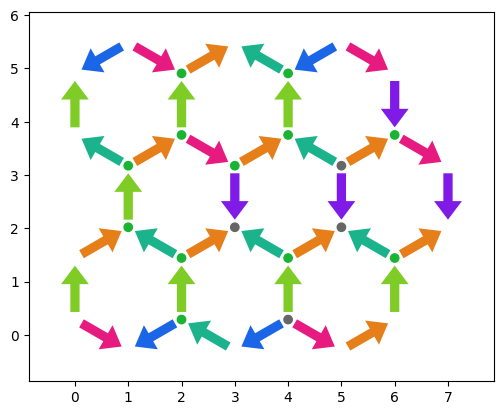

In [31]:
vpos = vertex_pos(pos, vertices)
vtype = [vertex_type(spin[v], pos[v], angle[v]) for v in vertices]
print(vtype)

plot_vectors(pos, mag)
plt.scatter(*vpos.T, c=vtype, cmap='vertex-type');

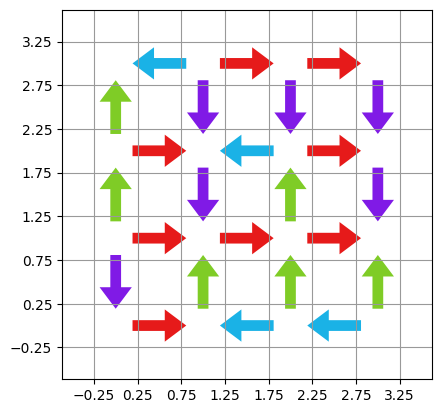

In [38]:
model2 = md.SquareSpinIceClosed(size=(3,3), init='random')
pos = model2.pos
angle = model2.angle
spin = model2.spin
mag = model2.vectors
grid = Grid(pos)
draw_grid(grid)

plot_vectors(pos, mag)

'vertices'

[array([ 4,  7,  8, 11]),
 array([ 5,  8,  9, 12]),
 array([11, 14, 15, 18]),
 array([12, 15, 16, 19])]

'vi'

array([1, 1, 3, 3], dtype=int64)

'vj'

array([1, 3, 1, 3], dtype=int64)

'vpos'

array([[1., 1.],
       [2., 1.],
       [1., 2.],
       [2., 2.]])

'*vpos.T'

array([1., 2., 1., 2.])

array([1., 1., 2., 2.])

vtype [3, 2, 3, 1]


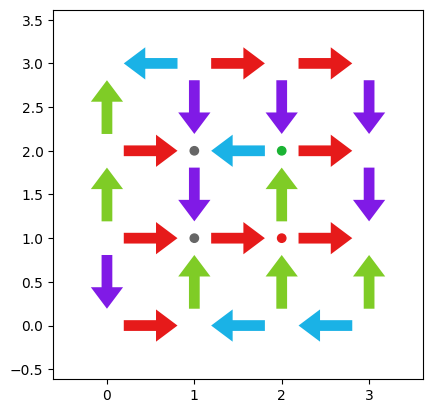

In [51]:
from flatspin.vertices import find_vertices, vertex_pos, vertex_type

win_size = (3, 3)
vi, vj, vertices = find_vertices(grid, pos, angle, win_size)
display('vertices',vertices)
display('vi',vi)
display('vj',vj)

vpos = vertex_pos(pos, vertices)
display('vpos',vpos)
display('*vpos.T',*vpos.T)
vtype = [vertex_type(spin[v], pos[v], angle[v]) for v in vertices]
print('vtype',vtype)

plot_vectors(pos, mag)
plt.scatter(*vpos.T, c=vtype, cmap='vertex-type');